In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
from wordcloud import WordCloud
from collections import Counter
import csv
from matplotlib import rcParams
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
data = pd.read_json('/content/fox-news-comments.json', lines=True)
data.head()

,title,text,label,succ,meta,user,mentions,prev
0,German lawmakers approve 'no means no' rape la...,Merkel would never say NO,1,,German lawmakers passed a bill Thursday that w...,barryswallows,,
1,German lawmakers approve 'no means no' rape la...,"Expect more and more women to be asking .. ""wh...",1,,German lawmakers passed a bill Thursday that w...,PostApocalypticHero,,
2,German lawmakers approve 'no means no' rape la...,Groping people in public wasn't already illega...,0,,German lawmakers passed a bill Thursday that w...,californiamojo,,
3,German lawmakers approve 'no means no' rape la...,"Merkel, possible the only person in charge who...",1,,German lawmakers passed a bill Thursday that w...,MikeSte,,
4,German lawmakers approve 'no means no' rape la...,"They know very well, no means NO! They need to...",1,,German lawmakers passed a bill Thursday that w...,scientist,,


In [13]:
data.head()

,title,text,label,succ,meta,user,mentions,prev
0,German lawmakers approve 'no means no' rape la...,Merkel would never say NO,1,,German lawmakers passed a bill Thursday that w...,barryswallows,,
1,German lawmakers approve 'no means no' rape la...,"Expect more and more women to be asking .. ""wh...",1,,German lawmakers passed a bill Thursday that w...,PostApocalypticHero,,
2,German lawmakers approve 'no means no' rape la...,Groping people in public wasn't already illega...,0,,German lawmakers passed a bill Thursday that w...,californiamojo,,
3,German lawmakers approve 'no means no' rape la...,"Merkel, possible the only person in charge who...",1,,German lawmakers passed a bill Thursday that w...,MikeSte,,
4,German lawmakers approve 'no means no' rape la...,"They know very well, no means NO! They need to...",1,,German lawmakers passed a bill Thursday that w...,scientist,,


In [14]:
data.label.value_counts()

0    1093
1     435
Name: label, dtype: int64

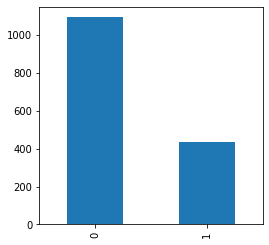

In [15]:
rcParams['figure.figsize'] = 4,4
data.label.value_counts().plot(kind="bar")

In [39]:
tweets = data[data['label']==1]
print(tweets.shape)

tweets_text_len = tweets['text'].str.len()
print("The maximum lenght of string in HATEFUL class is {} words".format(max(tweets_text_len)))
print("The minimum lenght of string in HATEFUL class is {} words".format(min(tweets_text_len)))

(435, 8)
The maximum lenght of string in HATEFUL class is 1978 words
The minimum lenght of string in HATEFUL class is 5 words


In [40]:
norm = data[data['label']==0]
print(norm.shape)

norm_text_len = norm['text'].str.len()
print("The maximum lenght of string in NORMAL class is {} words".format(max(norm_text_len)))
print("The minimum lenght of string in NORMAL class is {} words".format(min(norm_text_len)))

(1093, 8)
The maximum lenght of string in NORMAL class is 2591 words
The minimum lenght of string in NORMAL class is 1 words


In [20]:
from statistics import mean
with open('/content/fox-news-comments.json', 'r', newline='') as f, open('results.csv', 'w', newline='') as output:
    reader = csv.reader(f, skipinitialspace=True)
    headers = next(reader)
    writer = csv.writer(output)
    writer.writerow(headers)
    writer.writerow([mean(map(len, col)) for col in zip(*reader)])

The average length of a comment in the dataset is 71.5834970530452 words.


In [21]:
#tokenization = splitting up a larger body of text into smaller lines, words 

def tokenize_and_stop_words(text):
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in stop]
    joined_words = ( " ".join(meaningful_words))
    return joined_words

tweets['text'] = tweets['text'].apply(tokenize_and_stop_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


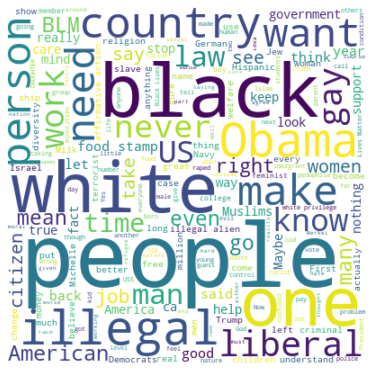

In [22]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 400,
        height = 400,
        background_color = 'white').generate(str(text))
    fig = plt.figure(
        figsize = (5, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

tweets_text = tweets.text.values
generate_word_cloud(tweets_text)

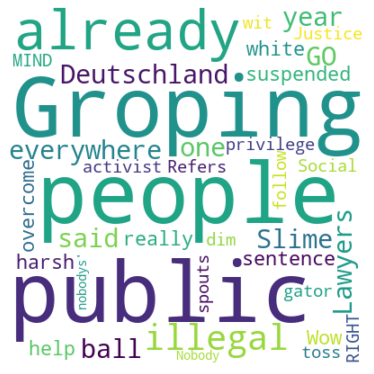

In [23]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 400,
        height = 400,
        background_color = 'white').generate(str(text))
    fig = plt.figure(
        figsize = (5, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

tweets_text = norm.text.values
generate_word_cloud(tweets_text)

In [24]:
set(data.text)

{'Not politically correct, just correct. There is no general E. Lee. Calling people names like "gruber", shows you are an immature child. Grow up.',
 'Watching college students being interviewed on the streets and asked simple common knowledge questions...."higher education" is a cruelty joke.',
 'Transgenderism is just that, an "ism", meaning it is a condition of mind not based on reality. So when I say "real thing" I\'m referring to the reality that such a person is confused because they think in their minds they are something which they are not in reality. Condemnation of such confused people isn\'t appropriate though either, precisely because they are confused and their inner motivations which bring on that confusion are something they don\'t understand themselves.',
 'Leviticus 25:44 “‘Your male and female sla ves are to come from the nations around you; from them you may buy sla ves. 45 You may also buy some of the temporary residents living among you and members of their clans b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


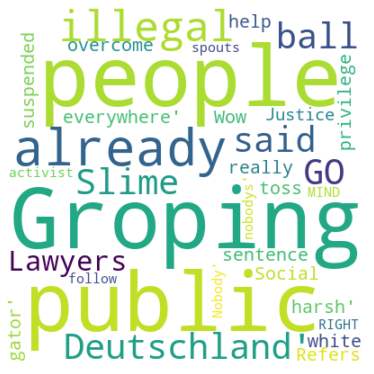

In [25]:
normal = data[data['label']==0]
normal['text'] = normal['text'].apply(tokenize_and_stop_words)

norm_lang = normal['text'].values
generate_word_cloud(norm_lang)

In [26]:
hateful = data[data['label']==1]
hateful['text'] = hateful['text'].apply(tokenize_and_stop_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


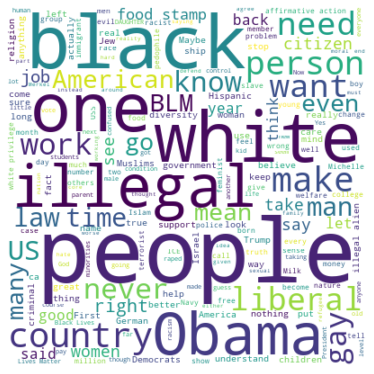

In [27]:
hate_speech = hateful['text'].values
generate_word_cloud(hate_speech)

In [28]:
hateful.head()

,title,text,label,succ,meta,user,mentions,prev
0,German lawmakers approve 'no means no' rape la...,Merkel would never say NO,1,,German lawmakers passed a bill Thursday that w...,barryswallows,,
1,German lawmakers approve 'no means no' rape la...,Expect women asking men longer interested We g...,1,,German lawmakers passed a bill Thursday that w...,PostApocalypticHero,,
3,German lawmakers approve 'no means no' rape la...,Merkel possible person charge worse Obama tryi...,1,,German lawmakers passed a bill Thursday that w...,MikeSte,,
4,German lawmakers approve 'no means no' rape la...,They know well means NO They need pass law mak...,1,,German lawmakers passed a bill Thursday that w...,scientist,,
5,German lawmakers approve 'no means no' rape la...,look like merkel want get laid,1,,German lawmakers passed a bill Thursday that w...,AllaGranovskaya,,


In [29]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [30]:
word = basic_clean(''.join(str(data['text'].tolist())))

In [31]:
bigrams_series = (pd.Series(nltk.ngrams(word, 2)).value_counts())[:20]

Text(0.5, 0, 'Number of Occurances')

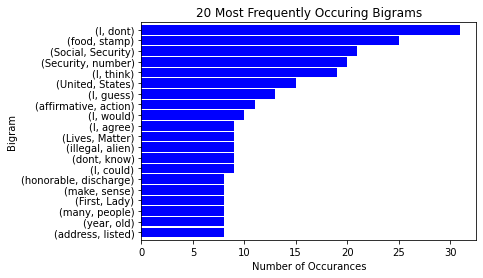

In [32]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Number of Occurances')

Text(0.5, 0, 'Number of Occurances')

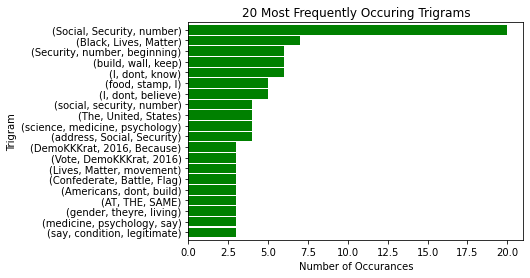

In [33]:
trigrams_series = (pd.Series(nltk.ngrams(word, 3)).value_counts())[:20]
trigrams_series.sort_values().plot.barh(color='green', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('Number of Occurances')

In [34]:
#a basic model
x_train, x_test, y_train, y_test = train_test_split(data['text'], data.label,
shuffle=False, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

In [35]:
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 65.69%


In [36]:
print(confusion_matrix(y_test, prediction))

[[200   0]
 [105   1]]


In [37]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       200
           1       1.00      0.01      0.02       106

    accuracy                           0.66       306
   macro avg       0.83      0.50      0.41       306
weighted avg       0.77      0.66      0.52       306



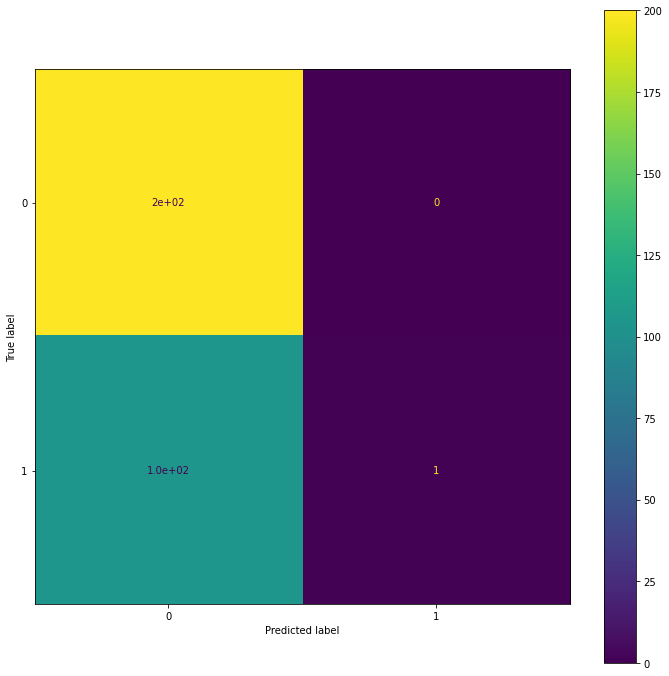

In [38]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(model,x_test,y_test, ax=ax)
plt.show()